In [ ]:
'''

Principal Component Analysis is one of the methods of dimensionality reduction and in essence, 
creates a new variable which contains most of the information in the original variable.

The new variables/dimensions created:
- Are linear combinations
- Are uncorrelated with one another
- Orthogonal in original dimension space
- Capture as much of the original variance in the data as possible.

By finding the eigenvalues and eigenvectors of the covariance matrix, we find that the eigenvectors 
with the largest eigenvalues correspond to the dimensions that have the strongest correlation in the
dataset.

'''

'\n\nPrincipal Component Analysis is one of the methods of dimensionality reduction and in essence, \ncreates a new variable which contains most of the information in the original variable.\n\nThe new variables/dimensions created:\n- Are linear combinations\n- Are uncorrelated with one another\n- Orthogonal in original dimension space\n- Capture as much of the original variance in the data as possible.\n\nBy finding the eigenvalues and eigenvectors of the covariance matrix, we find that the eigenvectors \nwith the largest eigenvalues correspond to the dimensions that have the strongest correlation in the\ndataset.\n\n'

- Context

This dataset consist of data From 1985 Ward's Automotive Yearbook. Here are the sources

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

- Content

This data set consists of three types of entities:

 (a) the specification of an auto in terms of various characteristics.
 
  (b) its assigned insurance risk rating.
  
   (c) its normalized losses in use as compared to other cars.
   
 The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r'/content/Automobile_data.csv')

#Data Analysis

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [ ]:
df.describe().columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
 df.replace('?', np.nan, inplace=True)
 df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

normalized losses, num-of-doors, bore, stroke, horsepower, peak-rpm, price are the features with missing values

In [ ]:
df['normalized-losses'].mode()

0    161
dtype: object

In [ ]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].median())
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [ ]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df['normalized-losses']=df['normalized-losses'].astype(float)
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [ ]:
df[df['num-of-doors'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [ ]:
df[(df['body-style']=='sedan') & (df['make']=='dodge') | (df['make']=='mazda')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
50,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,30,31,5195.0
51,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6095.0
52,1,104.0,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6795.0
53,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0


In [ ]:
df['num-of-doors']= df['num-of-doors'].fillna('four')

In [ ]:
df['num-of-doors'].isnull().sum()

0

In [ ]:
df[df['bore'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


In [ ]:
px.box(df['bore'])

In [ ]:
df['bore']=df['bore'].fillna(df['bore'].mean())

In [ ]:
df[df['horsepower'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,115.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,115.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [ ]:
px.box(df['horsepower'])

In [ ]:
df['horsepower'].median()

95.0

In [ ]:
df['horsepower']=df['horsepower'].fillna(df['horsepower'].median())

In [ ]:
df[df['stroke'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,3.329751,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,3.329751,NaN,9.4,135.0,6000.0,16,23,15645.0


In [ ]:
px.box(df['stroke'])

In [ ]:
df.stroke.median()

3.29

In [ ]:
df['stroke']=df['stroke'].fillna(df['stroke'].median())

In [ ]:
df[df['peak-rpm'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,115.0,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,95.0,NaN,23,31,9295.0
131,2,115.0,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,95.0,NaN,23,31,9895.0


In [ ]:
px.box(df['peak-rpm'])

In [ ]:
df['peak-rpm']=df['peak-rpm'].fillna(df['peak-rpm'].median())

In [ ]:
df[df['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,115.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,115.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,115.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,115.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


In [ ]:
px.box(df['price'])

In [ ]:
df['price']=df['price'].fillna(df['price'].median())

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

##Univariate Analysis

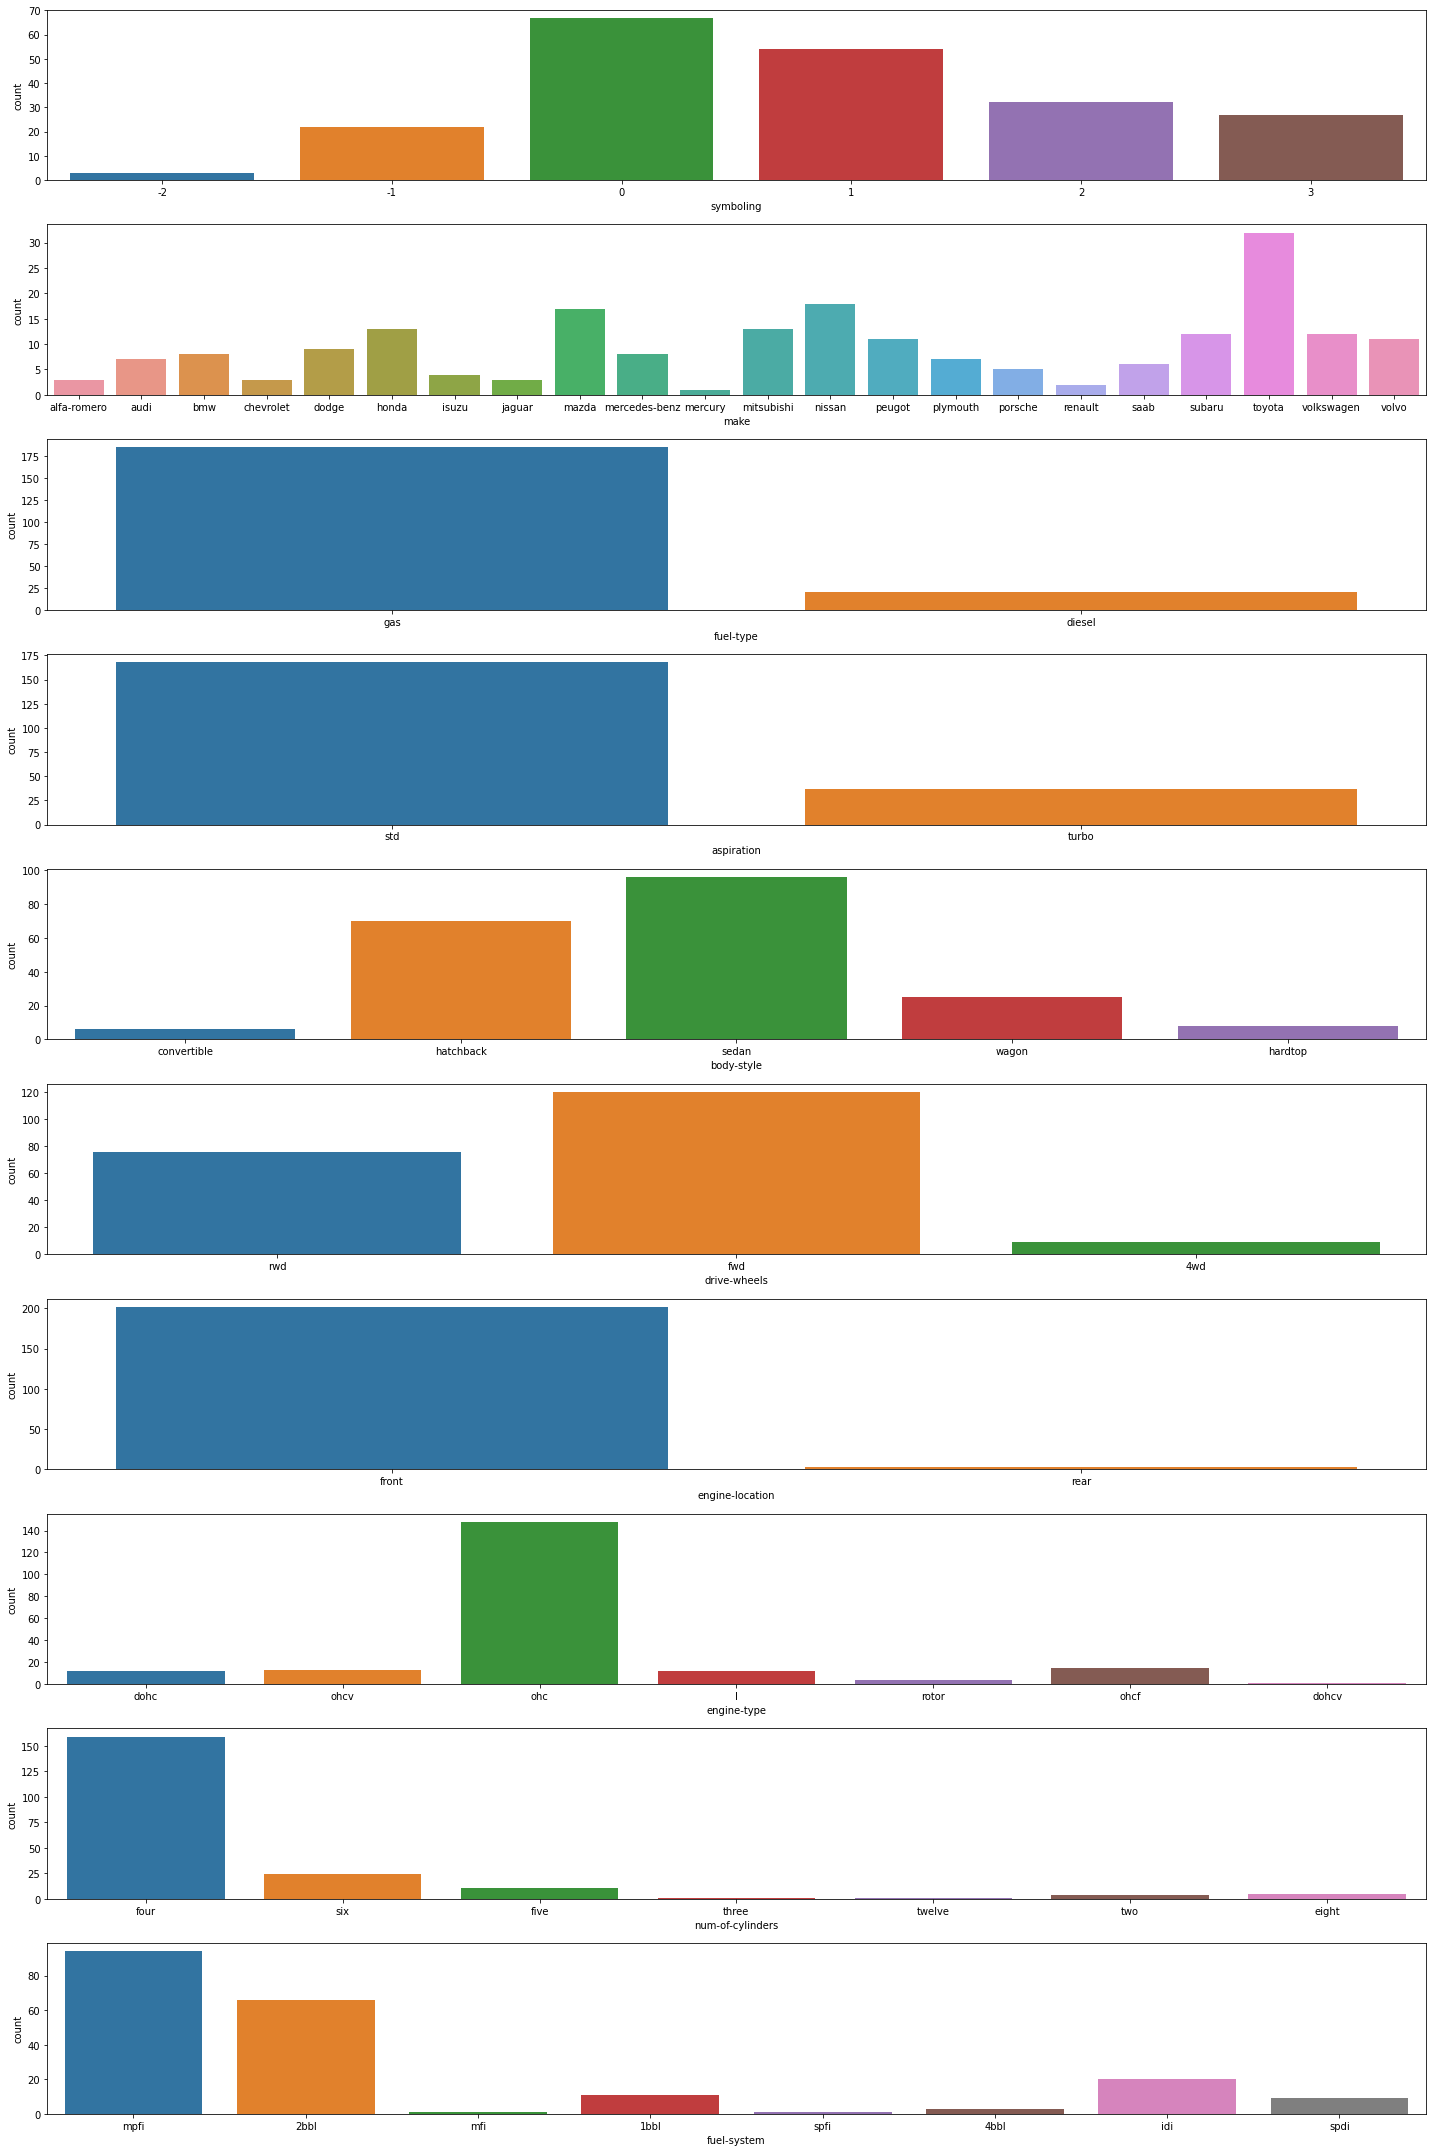

In [ ]:

categorical = 'symboling','make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'
fig, axs = plt.subplots(figsize=(20, 30))

for i in range(10):
  plt.subplot(10,1,i+1)
  sns.countplot(data=df,x=categorical[i])
  plt.tight_layout()

##Bivariate Analysis

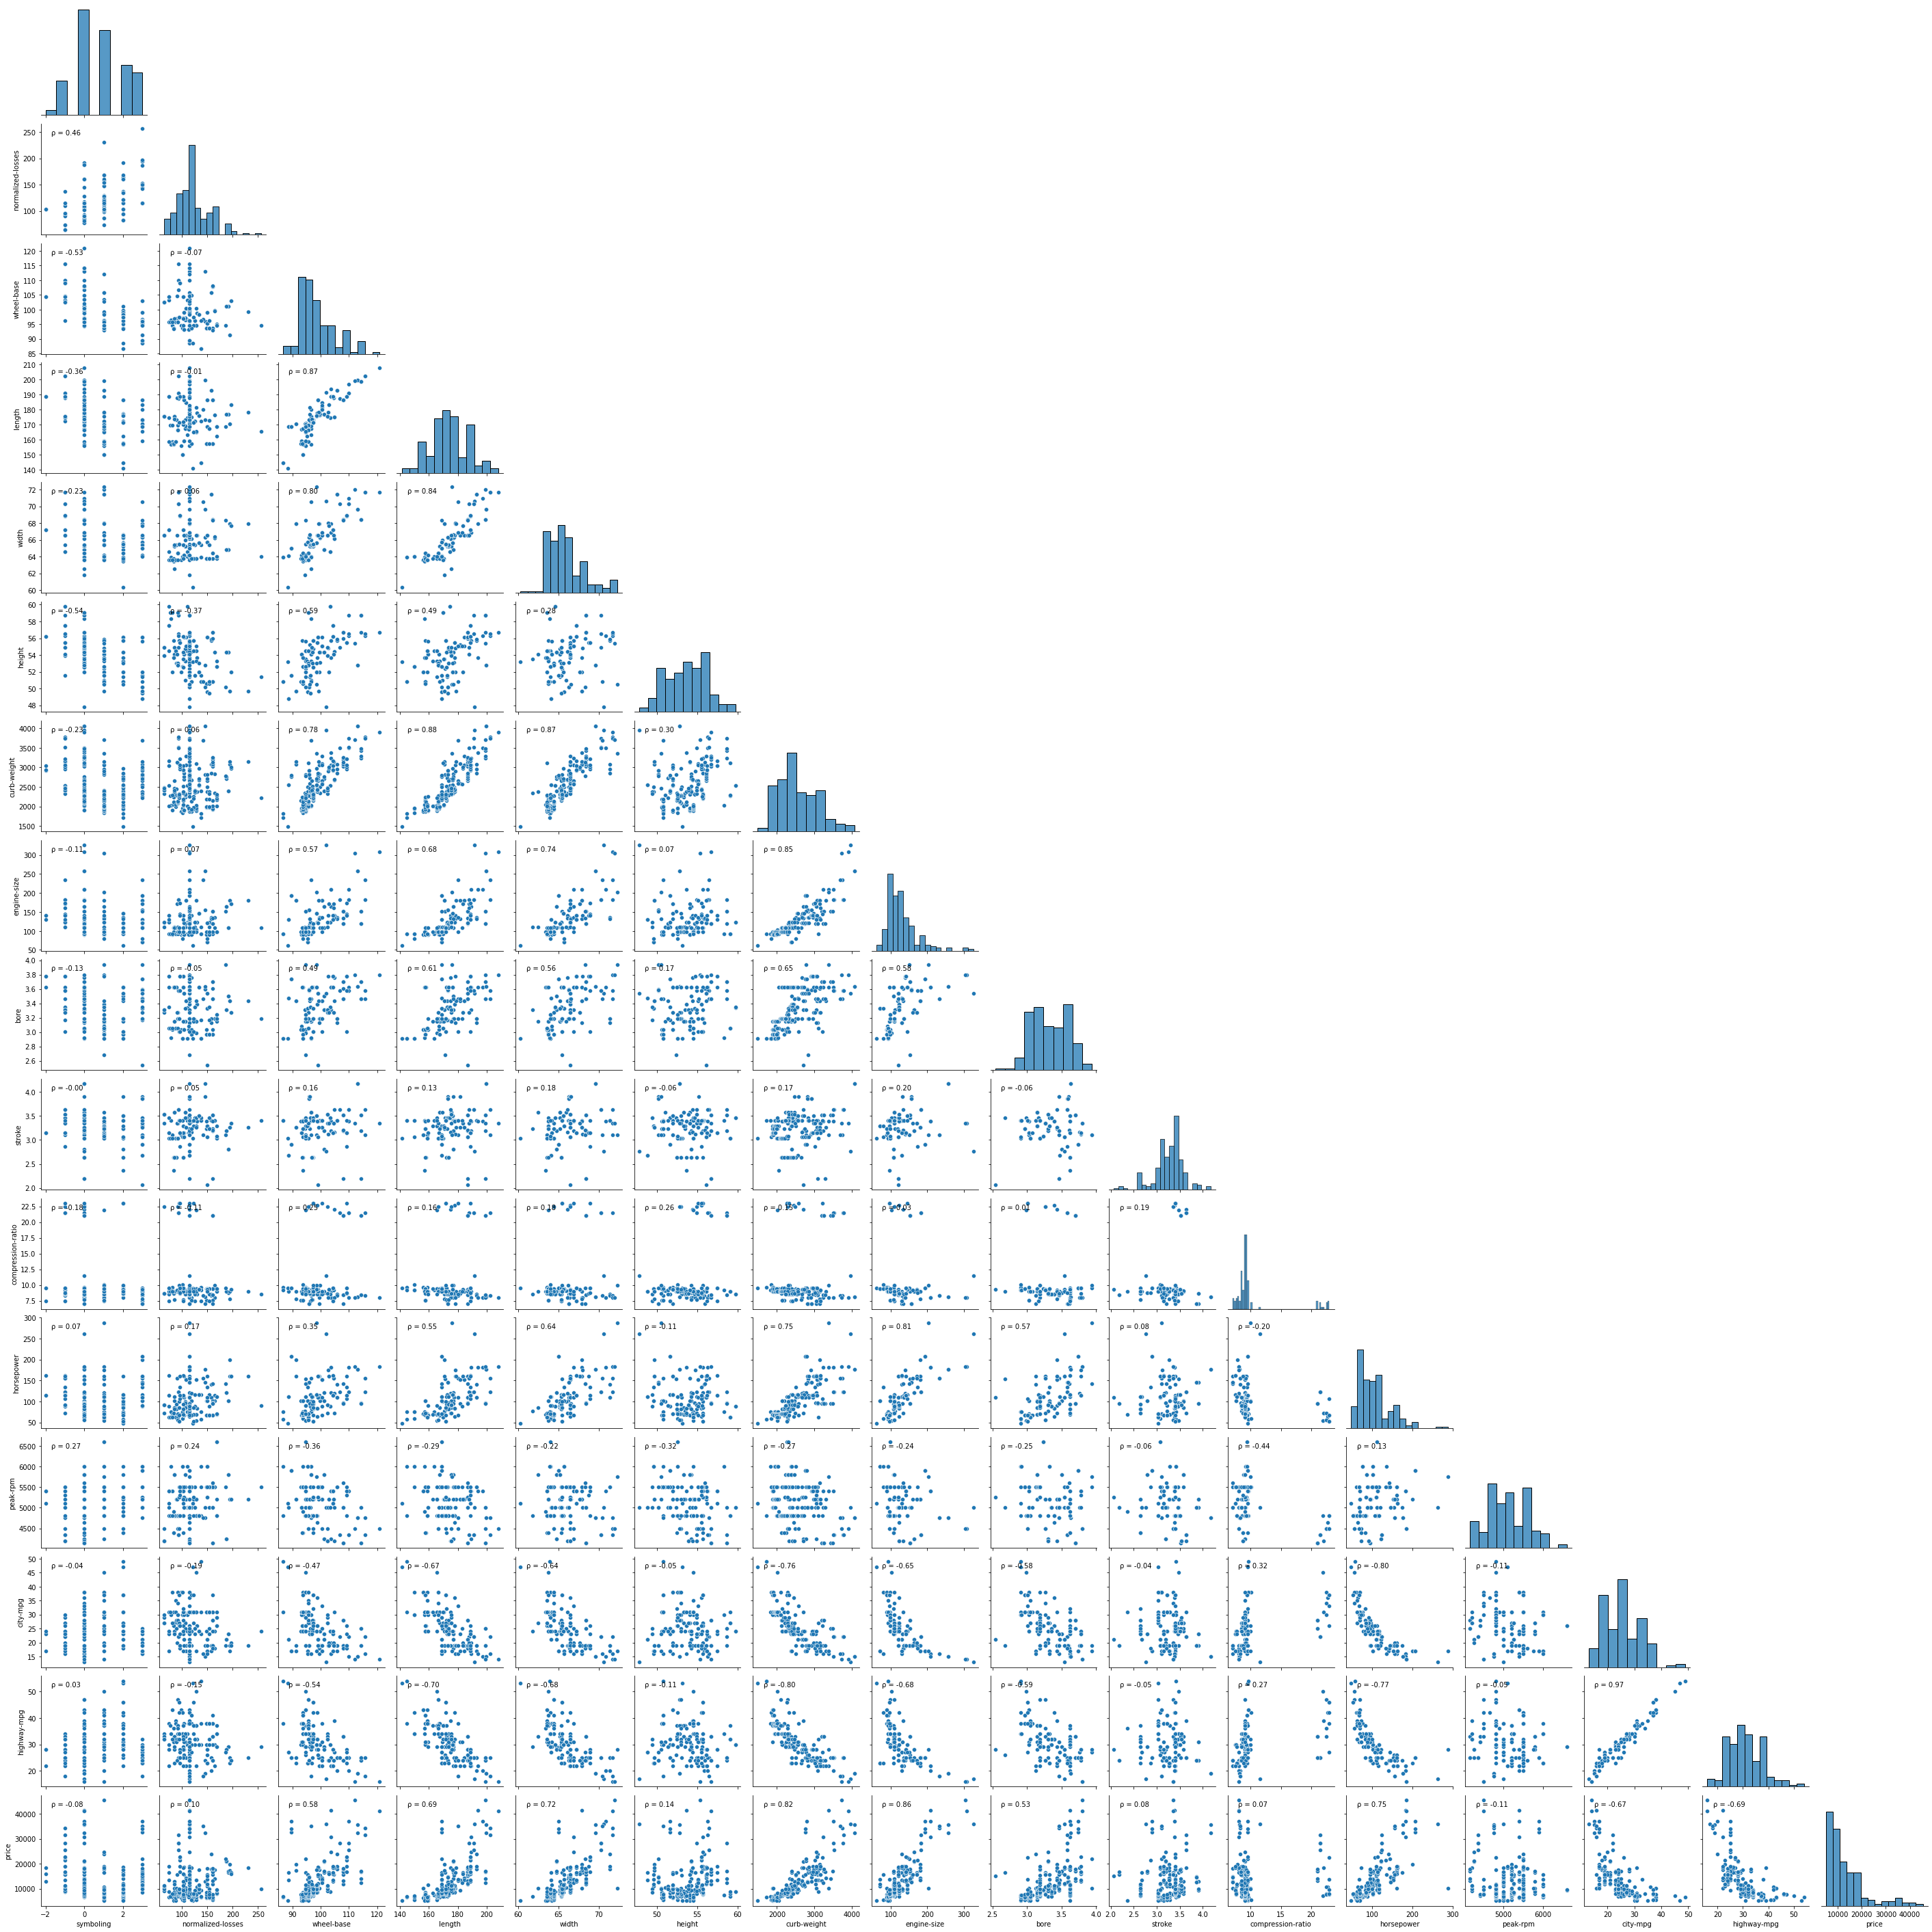

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

g = sns.pairplot(df, corner=True)
g.map_lower(corrfunc)
plt.show()

In [ ]:
numerical = 'normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price'
for i in numerical:
  fig=px.box(df[i],title=i)
  fig.show()

##Outlier Treatment

In [ ]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=np.percentile(col,[25,75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 * IQR)
  return lower_range, upper_range

In [ ]:
for column in df.columns:
  if df[column].dtype != 'object':
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [ ]:
for i in numerical:
  fig=px.box(df,df[i])
  fig.show()

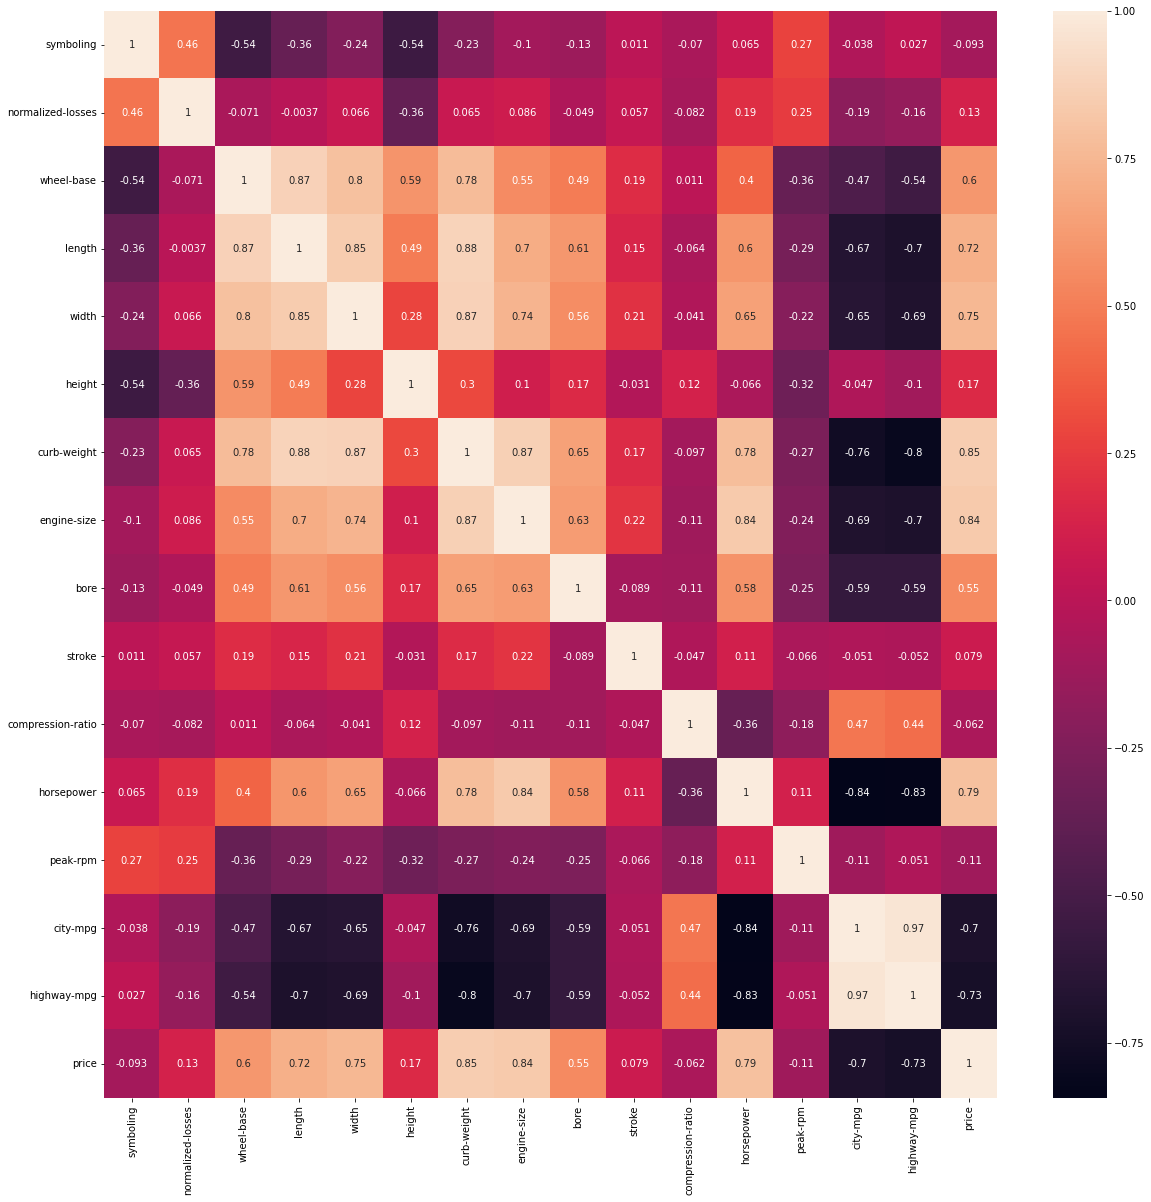

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

##Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x= df.iloc[:,[1,9,10,11,12,13,16,18,19,20,21,22,25]]
scaler=MinMaxScaler()
df1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
df1.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.436431,0.438010,0.491780,0.517073,0.493740,0.414106,0.435416,0.564108,0.502073,0.512226,0.400677,0.406504,0.310646
std,0.237554,0.212752,0.184139,0.192881,0.203627,0.201971,0.232701,0.193460,0.230734,0.247924,0.259596,0.198143,0.269937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.285714,0.376119,0.351852,0.350000,0.254849,0.246575,0.435714,0.375000,0.375000,0.160584,0.270833,0.109202
50%,0.396825,0.376130,0.479104,0.481481,0.525000,0.359193,0.404110,0.550000,0.525000,0.500000,0.343066,0.437500,0.211738
75%,0.571429,0.571429,0.626866,0.611111,0.641667,0.561288,0.547945,0.742857,0.625000,0.625000,0.496350,0.562500,0.465521
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Principal Component Analysis

In [ ]:
! pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 575 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 17.7 MB/s 
     |████████████████████████████████| 8.8 MB 43.6 MB/s 
     |████████████████████████████████| 98 kB 7.1 MB/s 
     |████████████████████████████████| 468 kB 55.2 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=95d9a72a4f4768cd9205876beec81717742a251614389725de37f73252757bca
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


##Bartlett's Test 

It is a test performed to test the hypothesis that the variables are uncorrelated in the data.

H0 = All variables in the data are uncorrelated.

H1= At least one pair of variable in the data is correlated.


The fact that if and only if the null hypothesis get rejected PCA is advisable. If you fail to reject the null hypothesis one should not go ahead with PCA. 

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value= calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(2391.181636625661, 0.0)

As the p-value is 0.0 we can reject tthe null hypothesis and agree that there is atleast one pair of variables in the data which are correlated. Hence, PCA is recommended.

##KMO Test - Kaiser - Meyer - olkin test

It is a measure of sampling adequacy (MCA) is an index used to examine how appropriate PCA is.

If MSA < 0.5 - PCA is not recommended. Since, no reduction is expected.

If MSA > 0.7 - PCA is expected to provide considerable reduction in the dimension and extraction of meaningful components.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df1)
kmo_model

/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:245: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



0.852716833965528

As the MSA is 0.85 which is MSA > 0.7 we can go ahead with PCA

In [ ]:
df1.shape

(205, 13)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit_transform(df1)

array([[-0.18486204,  0.294162  ,  0.20671965,  0.49888638, -0.2891675 ],
       [-0.13003199,  0.30355104,  0.19615363,  0.52327185, -0.30396443],
       [ 0.14936917,  0.24807503, -0.12604431, -0.15918838, -0.27149949],
       ...,
       [ 0.72678052, -0.11877023,  0.29629774,  0.26311643,  0.04460536],
       [ 0.53556851, -0.5277087 , -0.36965409,  0.04196267, -0.08873266],
       [ 0.65273772, -0.2922865 ,  0.06458198,  0.18692894,  0.00492307]])

##Cumulative Variance

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.4695311 , 0.62694787, 0.71864483, 0.80477693, 0.86557158])

##Scree Plot

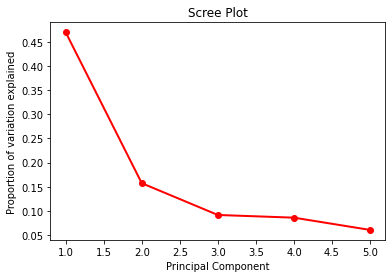

In [ ]:
pc_values = np.arange(pca.n_components) + 1
plt.plot(pc_values,pca.explained_variance_ratio_,'ro-', linewidth = 2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of variation explained')
plt.show()

##Factor Loading Validation

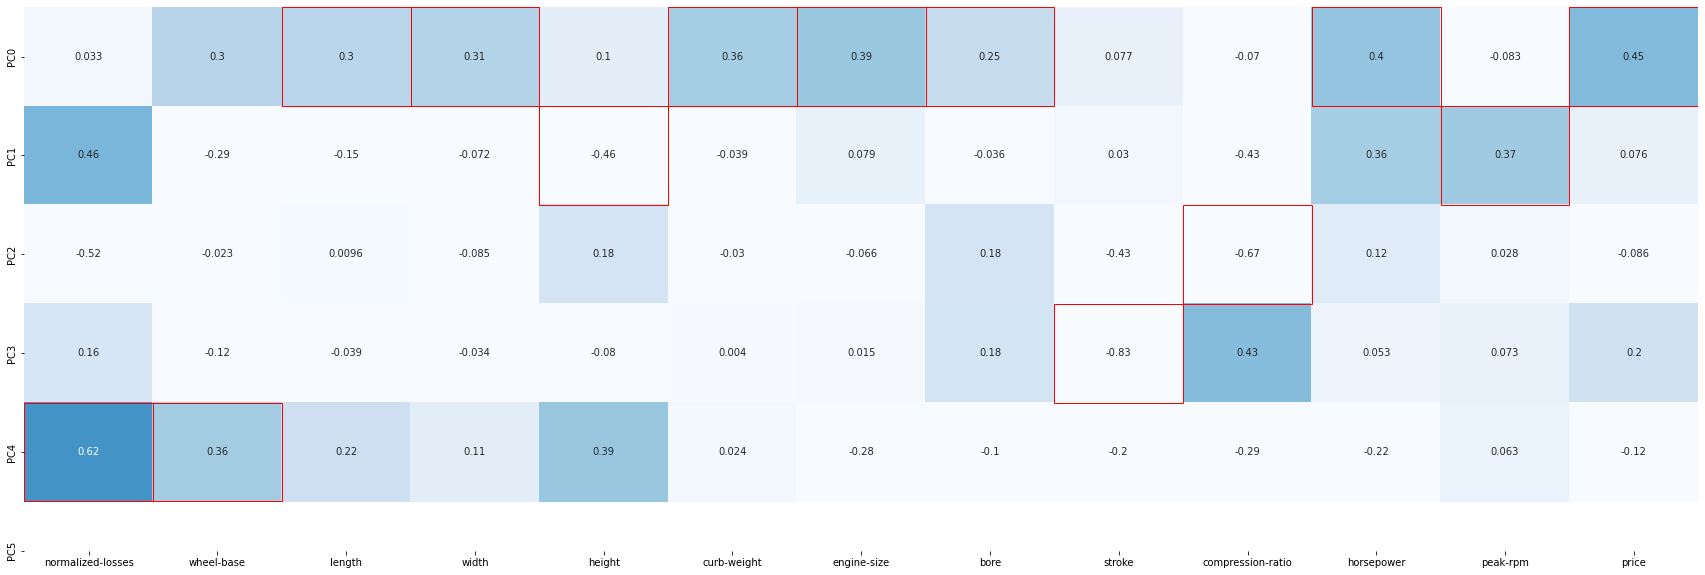

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns = list(df1))

from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize =(30,10), facecolor='w',edgecolor='k')
ax = sns.heatmap(df_comp,annot=True,vmax = 1, vmin = 0, cmap = 'Blues',cbar= False, fmt = '.2g',ax=ax,
                 yticklabels = ['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_comp.abs().idxmax(axis=0)

for col, variable in enumerate(df_comp.columns):
  position=df_comp.index.get_loc(column_max[variable])
  ax.add_patch(Rectangle((col,position),1,1,fill=False,edgecolor='red',lw=1))

It can be observed that the features:

- PC0 - Length, Width, Curb-Weight, engine-size, bore, horsepower and price 
- PC1 - Height,peak-rpm
- PC2 - Compression-ratio
- PC3 - stroke
- PC4 - normalized-losses, wheel-base


These 5 components carry 86.5% of the total variance along the original data.

In [ ]:
#Independent and dependent features
x = df1.drop('price',axis=1) #Independent feature
y= df1.price 

In [ ]:
#train test split
from sklearn.model_selection import train_test_split

#x_train and y_train is to test the model, x_test and y_test is to test the model
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.30, random_state=1)

In [ ]:
x_train

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm
124,0.396825,0.336347,0.479104,0.555556,0.200000,0.515904,0.650685,0.750000,1.000000,0.00000,0.708029,0.354167
181,0.396825,0.647378,0.697015,0.574074,0.525000,0.645074,0.684932,0.521429,0.575000,0.56250,0.788321,0.437500
154,0.126984,0.329114,0.426866,0.305556,0.941667,0.311094,0.212329,0.364286,0.308333,0.50000,0.102190,0.270833
53,0.380952,0.235081,0.383582,0.361111,0.525000,0.177269,0.205479,0.350000,0.408333,0.50000,0.145985,0.354167
94,0.500000,0.285714,0.361194,0.324074,0.558333,0.179597,0.246575,0.435714,0.525000,0.62500,0.153285,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.309524,0.452080,0.679104,0.574074,0.691667,0.468192,0.410959,0.714286,0.341667,0.59375,0.452555,0.458333
137,0.309524,0.452080,0.679104,0.574074,0.691667,0.527153,0.410959,0.714286,0.341667,0.50000,0.817518,0.562500
72,0.611111,0.361664,0.585075,0.944444,0.250000,0.852211,1.000000,0.657143,0.366667,0.28125,0.781022,0.250000
140,0.142857,0.242315,0.241791,0.324074,0.658333,0.291699,0.321918,0.771429,0.000000,0.40625,0.182482,0.104167


In [ ]:
 from sklearn.linear_model import LinearRegression

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_train

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm
124,0.396825,0.336347,0.479104,0.555556,0.200000,0.515904,0.650685,0.750000,1.000000,0.00000,0.708029,0.354167
181,0.396825,0.647378,0.697015,0.574074,0.525000,0.645074,0.684932,0.521429,0.575000,0.56250,0.788321,0.437500
154,0.126984,0.329114,0.426866,0.305556,0.941667,0.311094,0.212329,0.364286,0.308333,0.50000,0.102190,0.270833
53,0.380952,0.235081,0.383582,0.361111,0.525000,0.177269,0.205479,0.350000,0.408333,0.50000,0.145985,0.354167
94,0.500000,0.285714,0.361194,0.324074,0.558333,0.179597,0.246575,0.435714,0.525000,0.62500,0.153285,0.437500
...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.309524,0.452080,0.679104,0.574074,0.691667,0.468192,0.410959,0.714286,0.341667,0.59375,0.452555,0.458333
137,0.309524,0.452080,0.679104,0.574074,0.691667,0.527153,0.410959,0.714286,0.341667,0.50000,0.817518,0.562500
72,0.611111,0.361664,0.585075,0.944444,0.250000,0.852211,1.000000,0.657143,0.366667,0.28125,0.781022,0.250000
140,0.142857,0.242315,0.241791,0.324074,0.658333,0.291699,0.321918,0.771429,0.000000,0.40625,0.182482,0.104167


In [ ]:
y_train

124    0.312720
181    0.434847
154    0.113701
53     0.064499
94     0.089202
         ...   
133    0.288425
137    0.552229
72     1.000000
140    0.101636
37     0.113579
Name: price, Length: 143, dtype: float64

In [ ]:
# reg is the estimator, scoring is the parameter of accuracy

mse=cross_val_score(reg, x_train, y_train, scoring='neg_mean_squared_error', cv=5)


In [ ]:
mse.mean()

-0.02017524751428882

In [ ]:
##prediction
regp=reg.predict(x_test)

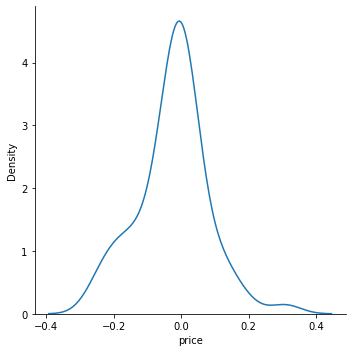

In [ ]:
import seaborn as sns

sns.displot(regp - y_test,kind='kde')

In [ ]:
from sklearn.metrics import r2_score

score = r2_score(regp, y_test)
score

0.7936738018989399